In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as skl

In [ ]:
#importing the dataset
dataset=pd.read_csv('/content/placement.csv')
print(dataset)

    Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]


In [ ]:
dataset.head(10)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
5,5,7.1,48.0,1
6,6,5.7,143.0,0
7,7,5.0,63.0,0
8,8,6.1,156.0,0
9,9,5.1,66.0,0


In [ ]:
dataset.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [ ]:
dataset.dtypes

Unnamed: 0      int64
cgpa          float64
iq            float64
placement       int64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [ ]:
# Fill null values with mean
dataset.fillna(dataset.mean(), inplace=True)

# Display the merged DataFrame
print(dataset)

    Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]


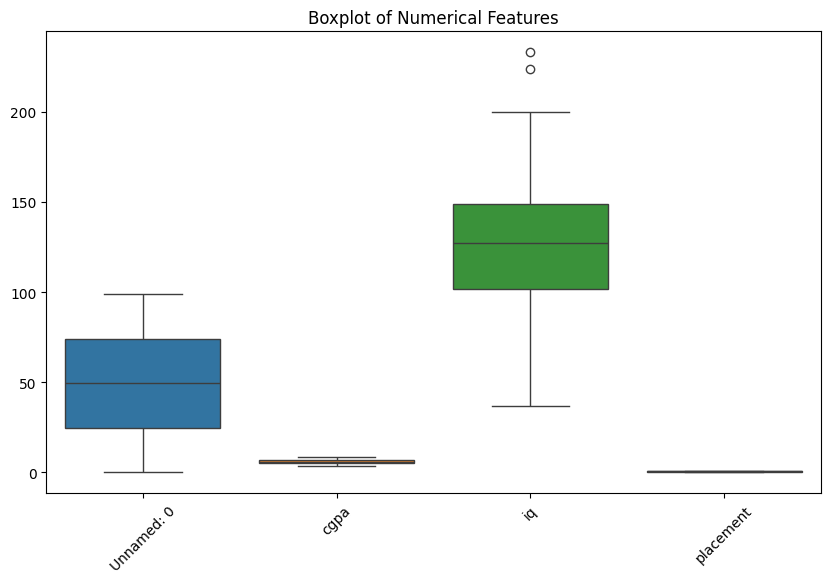

In [ ]:
# Visualize outliers with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Handle outliers
from scipy.stats import zscore

z_scores = zscore(dataset.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)
threshold = 3
outliers_mask = (abs_z_scores > threshold).any(axis=1)
merged_df = dataset[~outliers_mask]

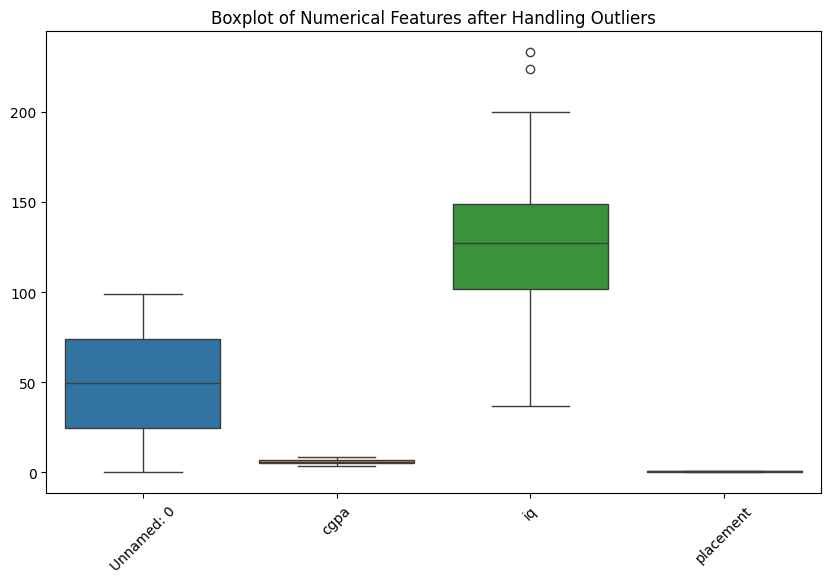

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers with boxplot after handling
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features after Handling Outliers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#feature and target variable
X = dataset['cgpa'].values[:, np.newaxis]
y = dataset['iq'].values

In [ ]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled, y)


LinearRegression()

In [ ]:
corr=dataset.corr()
print(corr)

            Unnamed: 0      cgpa        iq  placement
Unnamed: 0    1.000000  0.047478 -0.019080   0.144807
cgpa          0.047478  1.000000 -0.098791   0.821688
iq           -0.019080 -0.098791  1.000000  -0.083031
placement     0.144807  0.821688 -0.083031   1.000000


<Axes: >

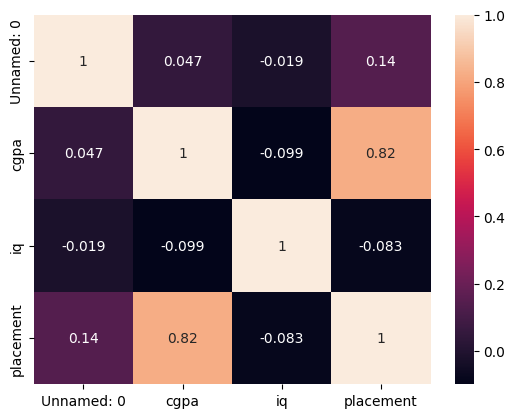

In [ ]:
sns.heatmap(corr,annot=True)

In [ ]:
# Define a simple cost function with Lasso regularization (mean squared error + L1 penalty)
def cost_function_with_lasso(y_pred, y_true, a0, a1, l1_penalty):
    mse = np.mean((y_pred - y_true) ** 2)
    lasso_penalty = l1_penalty * (np.abs(a0) + np.abs(a1))
    return mse + lasso_penalty

In [ ]:
# Define a function to compute gradients with Lasso regularization
def compute_gradients_with_lasso(X, y_pred, y_true, a0, a1, l1_penalty):
    m = len(y_true)
    error = y_pred - y_true
    grad_a0 = np.mean(error) + l1_penalty * np.sign(a0)
    grad_a1 = (np.mean(error * X) + l1_penalty * np.sign(a1))
    return grad_a0, grad_a1


In [ ]:
# Initialize parameters
a0 = 0.0
a1 = 1.0
learning_rate = 0.01
epochs = 1000
l1_penalty = 0.1  # Strength of Lasso regularization

In [ ]:
# Gradient Descent with Lasso regularization
for epoch in range(epochs):
    y_pred = a0 + a1 * X_scaled

    # Compute the cost with Lasso regularization
    cost = cost_function_with_lasso(y_pred, y, a0, a1, l1_penalty)

    # Compute gradients with Lasso regularization
    grad_a0, grad_a1 = compute_gradients_with_lasso(X_scaled, y_pred, y, a0, a1, l1_penalty)

    # Update parameters
    a0 -= learning_rate * grad_a0
    a1 -= learning_rate * grad_a1

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost}")

print("Final Parameters with Lasso Regularization:")
print("Intercept (a0):", a0)
print("Slope (a1):", a1)


Epoch 0: Cost = 16852.699999999997
Epoch 100: Cost = 3639.3794503743466
Epoch 200: Cost = 1867.296129704631
Epoch 300: Cost = 1629.216530670837
Epoch 400: Cost = 1597.0762479276304
Epoch 500: Cost = 1592.6810174639063
Epoch 600: Cost = 1592.0595376198091
Epoch 700: Cost = 1591.9643362615677
Epoch 800: Cost = 1591.9472123656967
Epoch 900: Cost = 1591.943318971723
Final Parameters with Lasso Regularization:
Intercept (a0): 123.47466925797708
Slope (a1): 0.0005025554158670862


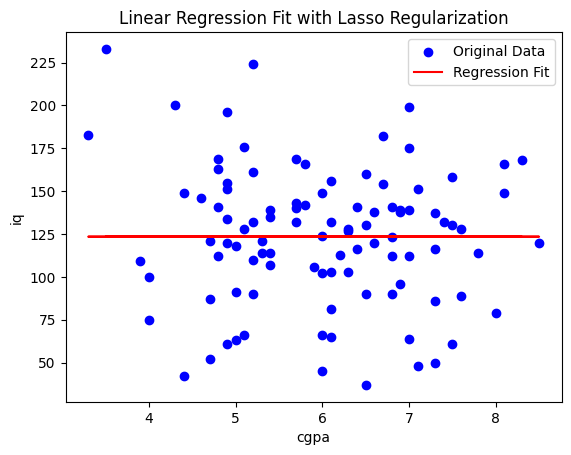

In [ ]:
# Plot the original data points
plt.scatter(X, y, color='blue', label='Original Data')

# Plot the regression line
plt.plot(X, a0 + a1 * X_scaled, color='red', label='Regression Fit')

# Add labels and title
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.title('Linear Regression Fit with Lasso Regularization')
plt.legend()

# Show plot
plt.show()

Epoch 0: Cost = 16852.699999999997
Epoch 100: Cost = 4741.783104422032
Epoch 200: Cost = 3347.2836790074653
Epoch 300: Cost = 3129.410744748834
Epoch 400: Cost = 3082.0653168946515
Epoch 500: Cost = 3069.499968857818
Epoch 600: Cost = 3065.885042714206
Epoch 700: Cost = 3064.8168462791978
Epoch 800: Cost = 3064.498576126886
Epoch 900: Cost = 3064.4035099742277
Final Parameters with Ridge Regularization:
Intercept (a0): 102.98274488067045
Slope (a1): 5.714057245603232e-06


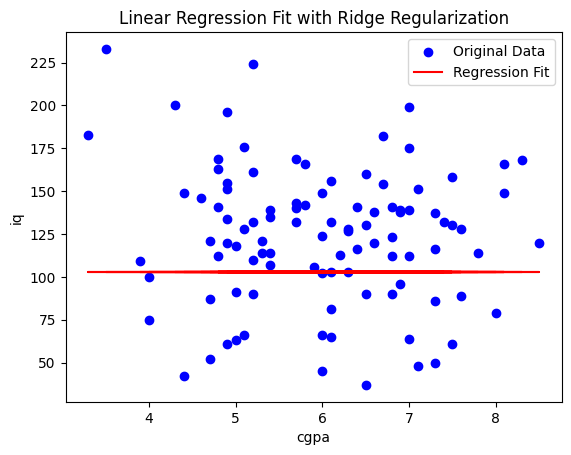

In [ ]:
def cost_function_with_ridge(y_pred, y_true, a0, a1, l2_penalty):
    mse = np.mean((y_pred - y_true) ** 2)
    ridge_penalty = l2_penalty * (a0**2 + a1**2)
    return mse + ridge_penalty

def compute_gradients_with_ridge(X, y_pred, y_true, a0, a1, l2_penalty):
    m = len(y_true)
    error = y_pred - y_true
    grad_a0 = np.mean(error) + 2 * l2_penalty * a0
    grad_a1 = np.mean(error * X) + 2 * l2_penalty * a1
    return grad_a0, grad_a1

# Initialize parameters
a0 = 0.0
a1 = 1.0
learning_rate = 0.01
epochs = 1000
l2_penalty = 0.1  # Strength of Ridge regularization

# Gradient Descent with Ridge regularization
for epoch in range(epochs):
    y_pred = a0 + a1 * X_scaled

    # Compute the cost with Ridge regularization
    cost = cost_function_with_ridge(y_pred, y, a0, a1, l2_penalty)

    # Compute gradients with Ridge regularization
    grad_a0, grad_a1 = compute_gradients_with_ridge(X_scaled, y_pred, y, a0, a1, l2_penalty)

    # Update parameters
    a0 -= learning_rate * grad_a0
    a1 -= learning_rate * grad_a1

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost}")

print("Final Parameters with Ridge Regularization:")
print("Intercept (a0):", a0)
print("Slope (a1):", a1)

# Plot the original data points
plt.scatter(X, y, color='blue', label='Original Data')

# Plot the regression line
plt.plot(X, a0 + a1 * X_scaled, color='red', label='Regression Fit')

# Add labels and title
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.title('Linear Regression Fit with Ridge Regularization')
plt.legend()

# Show plot
plt.show()


    Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]
Epoch 0: Ridge Cost = 16852.699999999997, Lasso Cost = 16852.699999999997
Epoch 100: Ridge Cost = 4741.783104422032, Lasso Cost = 3639.3794503743466
Epoch 200: Ridge Cost = 3347.2836790074653, Lasso Cost = 1867.296129704631
Epoch 300: Ridge Cost = 3129.410744748834, Lasso Cost = 1629.216530670837
Epoch 400: Ridge Cost = 3082.0653168946515, Lasso Cost = 1597.0762479276304
Epoch 500: Ridge Cost = 3069.499968857818, Lasso Cost = 1592.6810174639063
Epoch 600: Ridge Cost = 3065.885042714206, Lasso Cost = 159

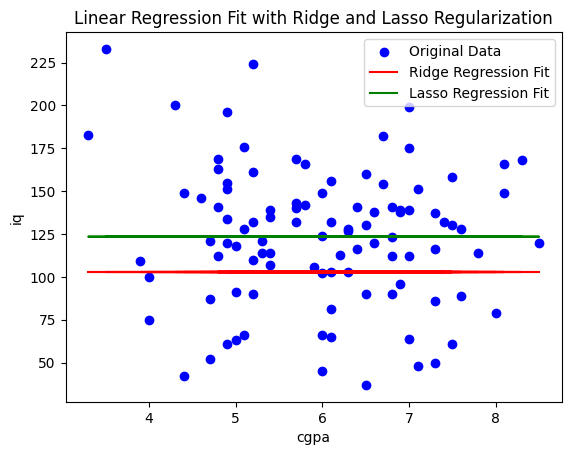

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Importing the dataset
dataset = pd.read_csv('/content/placement.csv')
print(dataset)

# Feature and target variable
X = dataset['cgpa'].values[:, np.newaxis]
y = dataset['iq'].values

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define cost functions with Ridge and Lasso regularization
def cost_function_with_ridge(y_pred, y_true, a0, a1, l2_penalty):
    mse = np.mean((y_pred - y_true) ** 2)
    ridge_penalty = l2_penalty * (a0**2 + a1**2)
    return mse + ridge_penalty

def cost_function_with_lasso(y_pred, y_true, a0, a1, l1_penalty):
    mse = np.mean((y_pred - y_true) ** 2)
    lasso_penalty = l1_penalty * (np.abs(a0) + np.abs(a1))
    return mse + lasso_penalty

# Define functions to compute gradients with Ridge and Lasso regularization
def compute_gradients_with_ridge(X, y_pred, y_true, a0, a1, l2_penalty):
    m = len(y_true)
    error = y_pred - y_true
    grad_a0 = np.mean(error) + 2 * l2_penalty * a0
    grad_a1 = np.mean(error * X) + 2 * l2_penalty * a1
    return grad_a0, grad_a1

def compute_gradients_with_lasso(X, y_pred, y_true, a0, a1, l1_penalty):
    m = len(y_true)
    error = y_pred - y_true
    grad_a0 = np.mean(error) + l1_penalty * np.sign(a0)
    grad_a1 = np.mean(error * X) + l1_penalty * np.sign(a1)
    return grad_a0, grad_a1

# Initialize parameters
a0_ridge = 0.0
a1_ridge = 1.0
a0_lasso = 0.0
a1_lasso = 1.0
learning_rate = 0.01
epochs = 1000
l2_penalty = 0.1  # Strength of Ridge regularization
l1_penalty = 0.1  # Strength of Lasso regularization

# Gradient Descent with Ridge and Lasso regularization
for epoch in range(epochs):
    # Predictions
    y_pred_ridge = a0_ridge + a1_ridge * X_scaled
    y_pred_lasso = a0_lasso + a1_lasso * X_scaled

    # Compute the cost with Ridge regularization
    cost_ridge = cost_function_with_ridge(y_pred_ridge, y, a0_ridge, a1_ridge, l2_penalty)

    # Compute gradients with Ridge regularization
    grad_a0_ridge, grad_a1_ridge = compute_gradients_with_ridge(X_scaled, y_pred_ridge, y, a0_ridge, a1_ridge, l2_penalty)

    # Update parameters for Ridge
    a0_ridge -= learning_rate * grad_a0_ridge
    a1_ridge -= learning_rate * grad_a1_ridge

    # Compute the cost with Lasso regularization
    cost_lasso = cost_function_with_lasso(y_pred_lasso, y, a0_lasso, a1_lasso, l1_penalty)

    # Compute gradients with Lasso regularization
    grad_a0_lasso, grad_a1_lasso = compute_gradients_with_lasso(X_scaled, y_pred_lasso, y, a0_lasso, a1_lasso, l1_penalty)

    # Update parameters for Lasso
    a0_lasso -= learning_rate * grad_a0_lasso
    a1_lasso -= learning_rate * grad_a1_lasso

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Ridge Cost = {cost_ridge}, Lasso Cost = {cost_lasso}")

print("Final Parameters with Ridge Regularization:")
print("Intercept (a0):", a0_ridge)
print("Slope (a1):", a1_ridge)

print("Final Parameters with Lasso Regularization:")
print("Intercept (a0):", a0_lasso)
print("Slope (a1):", a1_lasso)

# Plot the original data points
plt.scatter(X, y, color='blue', label='Original Data')

# Plot the regression lines
plt.plot(X, a0_ridge + a1_ridge * X_scaled, color='red', label='Ridge Regression Fit')
plt.plot(X, a0_lasso + a1_lasso * X_scaled, color='green', label='Lasso Regression Fit')

# Add labels and title
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.title('Linear Regression Fit with Ridge and Lasso Regularization')
plt.legend()

# Show plot
plt.show()
